<a href="https://colab.research.google.com/github/su-sumico/edsj/blob/main/5_multiple_regression_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

予測モデルの訓練の流れ

1. データセットを訓練データとテストデータに分割
2. 説明変数の標準化
3. 予測モデルの指定
4. 損失関数の指定
5. 訓練データと損失関数を用いたモデルの訓練
6. テストデータを用いたモデルの評価
---
Flow of training a predictive model

1. split the dataset into training and test data
2. standardize explanatory variables
3. specify a predictive model
4. specify a loss function
5. train the model using the training data and the loss function
6. evaluate the model using the test data

目的

* データセットを用いて、**説明変数を俯瞰、選択し**、住宅価格を予測する重回帰モデルを作成します。
---
Objective

* **Overlook and select explanatory variables** and implement a multiple regression model to predict house prices.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/5data/BostonHousing.csv')

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


seaborn.distplot: https://seaborn.pydata.org/generated/seaborn.distplot.html
* Seabornの displot は、ヒストグラムを作成する関数です。
* Seaborn's displot is a function that creates a histogram.

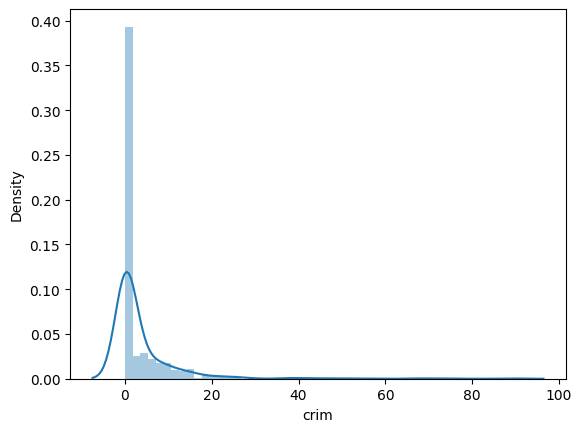

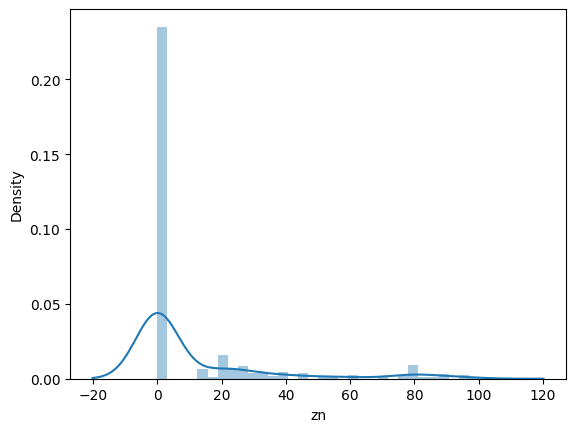

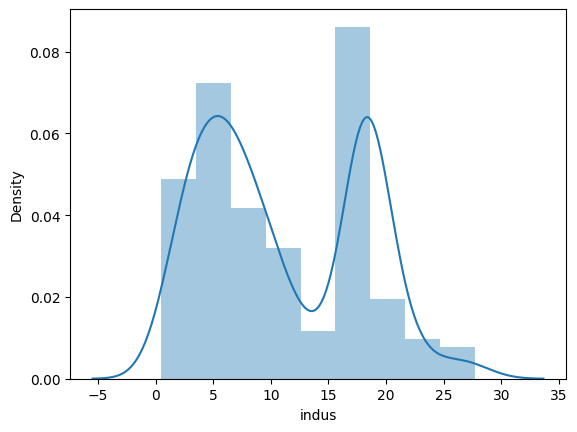

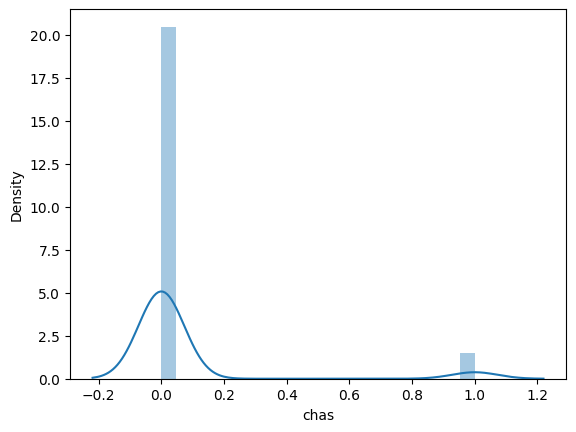

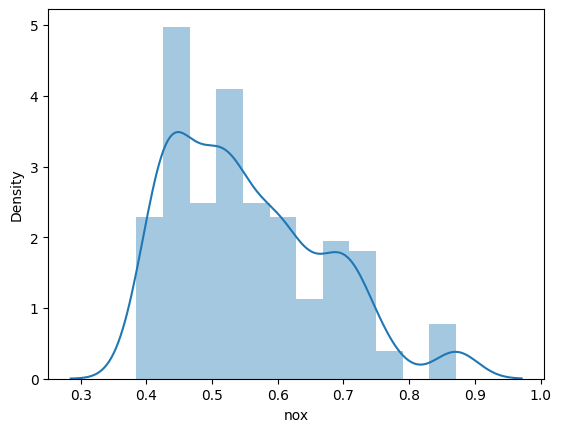

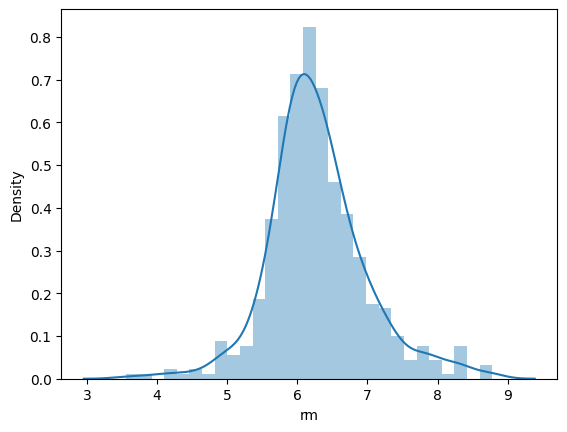

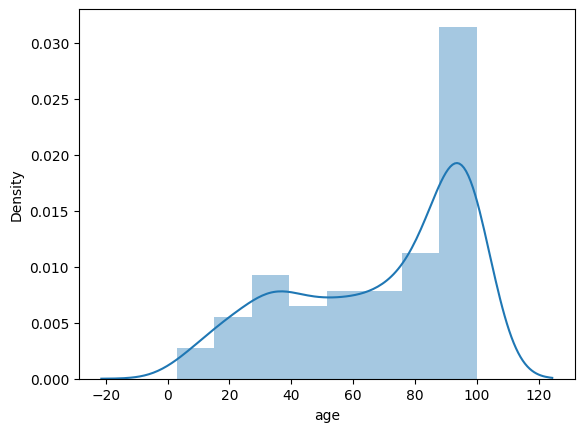

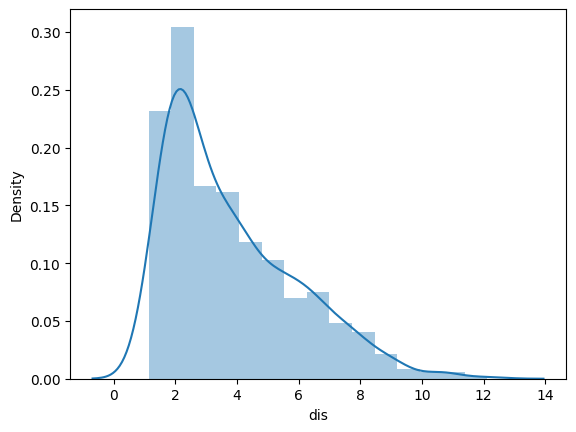

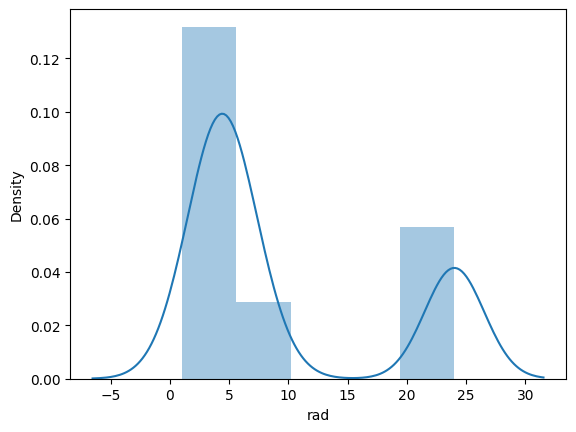

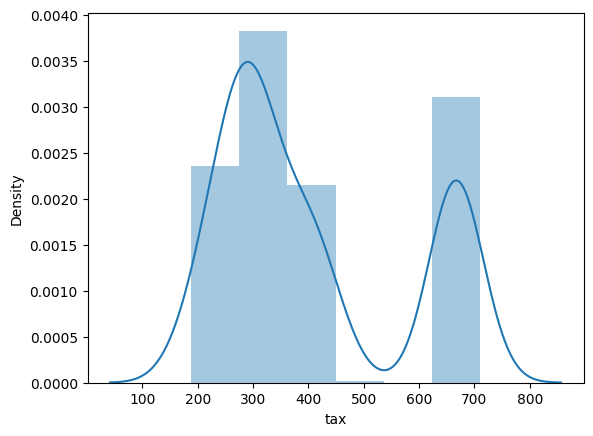

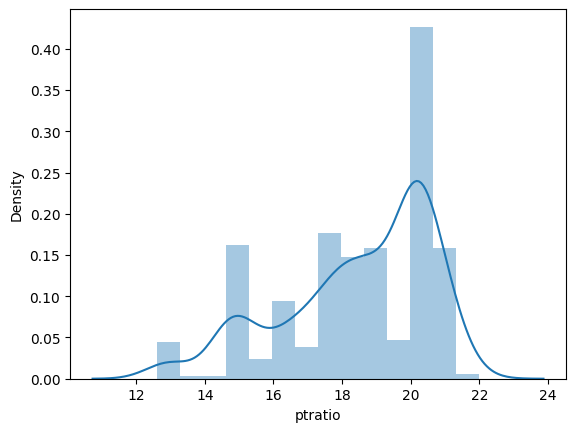

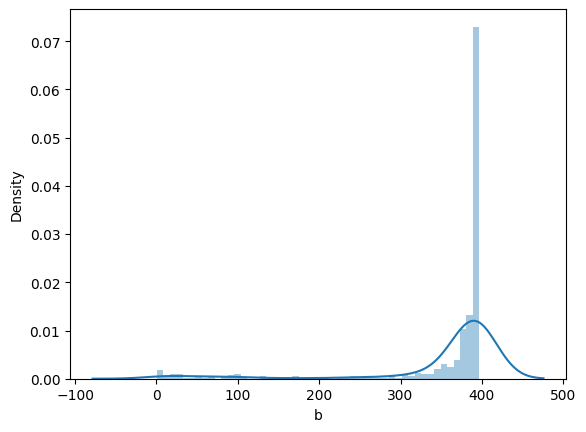

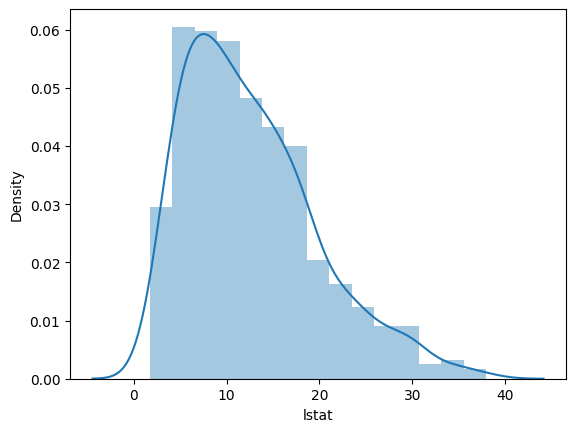

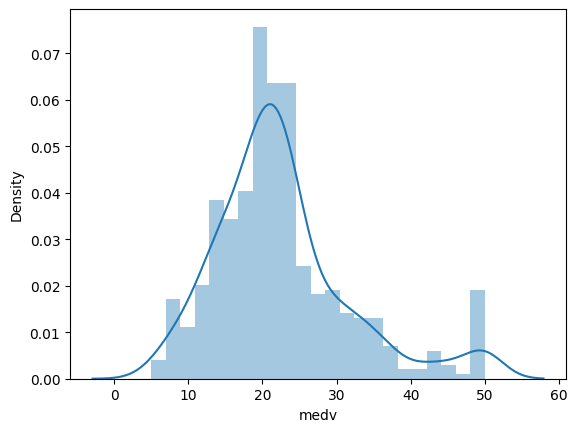

In [ ]:
for column in df.columns:
    sns.distplot(df[column])
    plt.show()

* ↑いくつかの値の分布は、二峰性または左/右非対称な分布に従うようです。
* 距離ベースのモデル（線形回帰など）がよりよくデータにフィットするように、それらを正規化する必要があるかもしれません。
---
* ↑Seems like the distribution of the some values follow bimodal or left/right skewed distributions.
* We may need to normalize them so our distance based models(such as Linear Regression) can fit the data better.

seaborn.heatmap: https://seaborn.pydata.org/generated/seaborn.heatmap.html
* seaborn.heatmap()関数を使うと、ヒートマップが作成できます。
* The seaborn.heatmap() function can be used to create a heat map.

<Axes: >

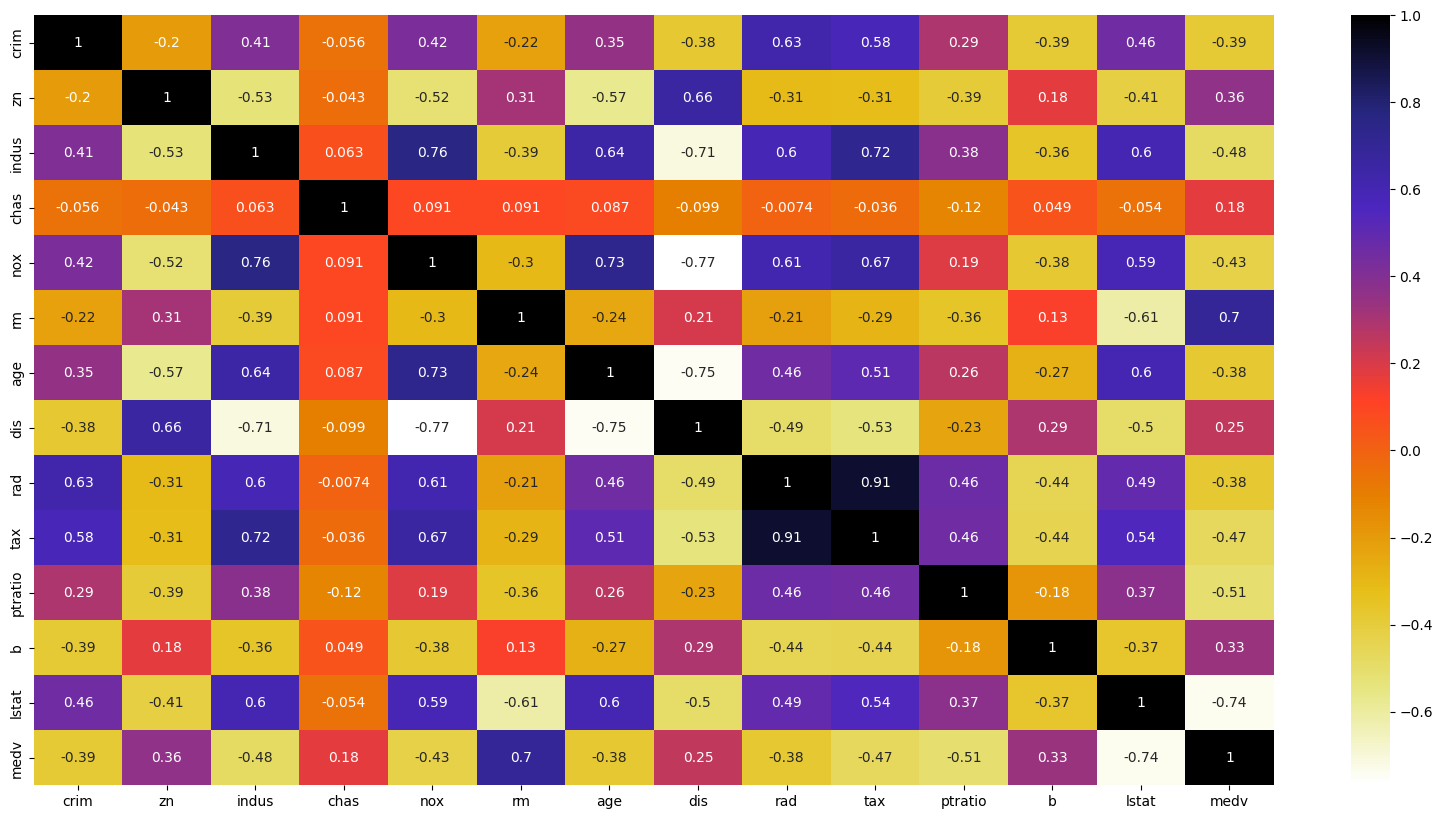

In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap = plt.cm.CMRmap_r)

説明変数を選択
* ↑RADとTAXは高い相関があることがわかりました。このような高い相関値をもつ説明変数を複数使うと、信頼性が低下する**「多重共線性（multicollinearity、マルチコ）」**と呼ばれる現象が発生しますので、どちらか一方(RAD)を除外します。
---
Select explanatory variables
* ↑It was found that RAD and TAX are highly correlated. When multiple explanatory variables with such high correlation values are used, a phenomenon called **"multicollinearity (multicollinearity, Martico),"** which decreases reliability, occurs, so one of them (RAD) is excluded.

In [ ]:
df.drop(['rad'], axis = 1, inplace = True)


説明変数の標準化
* ↑ほとんどの列が右側に裾が伸びた分布をしているので、データポイントを正規化するために、ここで対数変換を使用します。
* CHAS'列は0か1のユニークな値しかないので、'CHAS'列は持っていません。
---
Standardize explanatory variables
* ↑Since most columns have a skewed distribution hemmed to the right, a log transformation is used here to normalize the data points.
* The 'CHAS' column does not have a 'CHAS' column because it can only have a unique value of 0 or 1.

np.log1p: https://numpy.org/doc/stable/reference/generated/numpy.log1p.html
* np.log: np.arrayの対数を計算する関数
* np.log: Function to compute the logarithm of np.array

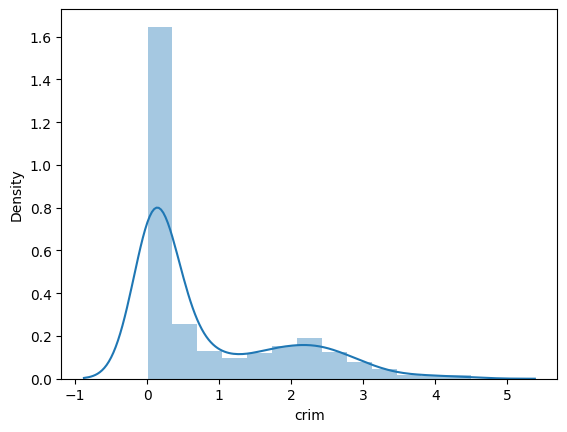

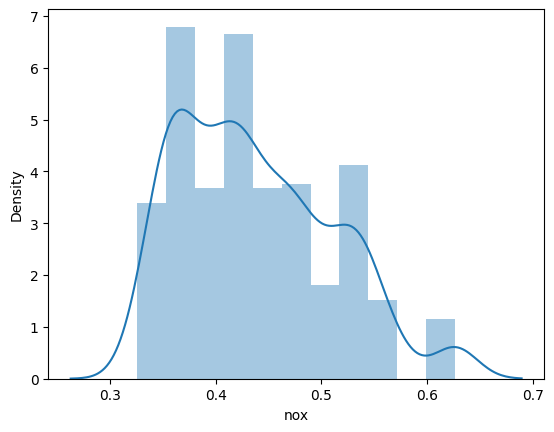

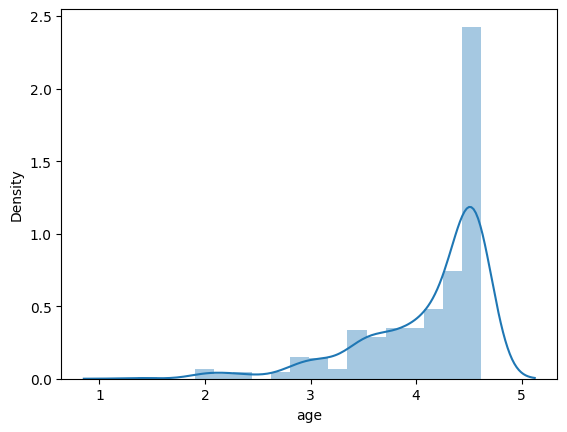

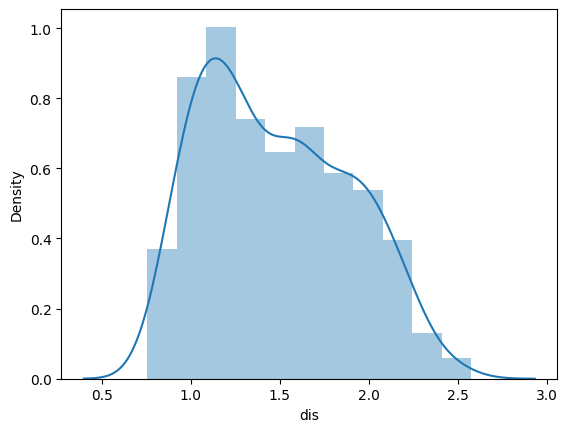

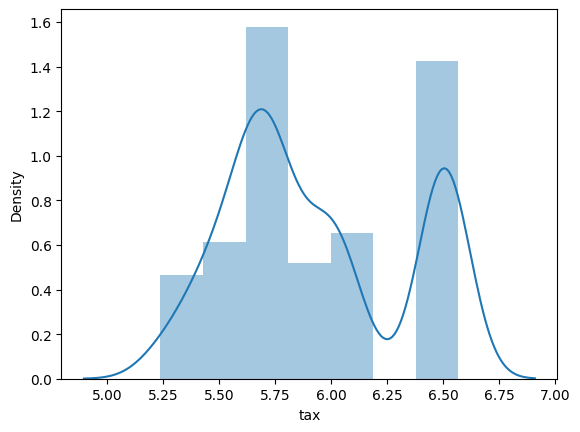

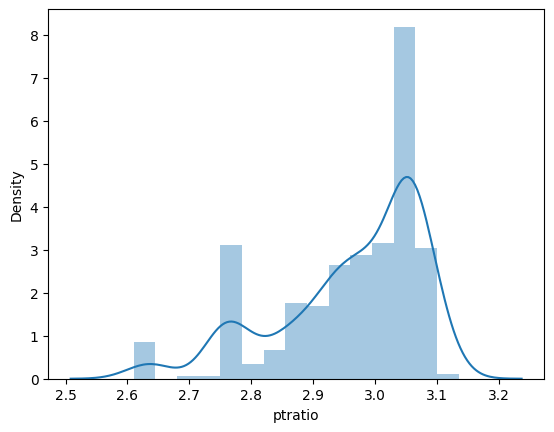

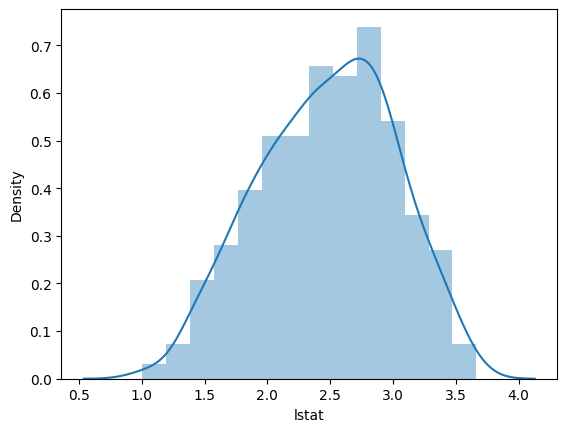

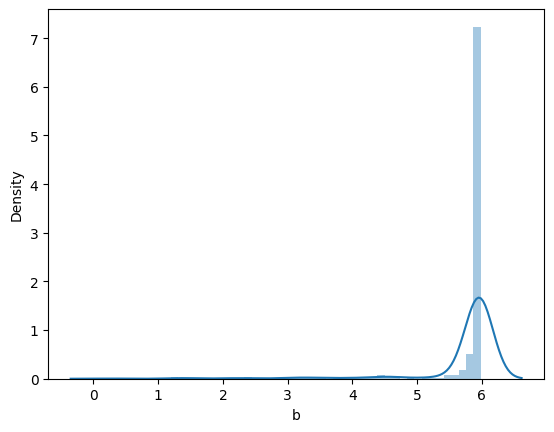

In [ ]:
columns_to_transform = ['crim', 'nox', 'age', 'dis', 'tax', 'ptratio', 'lstat', 'b']
for col in columns_to_transform:
    df[col] = np.log1p(df[col])
    sns.distplot(df[col]) #column
    plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 変数を定義/Define variables
X = df[['indus','rm','tax','ptratio','lstat']].values # 説明変数/explanatory variable
y = df['medv'].values                                 # 目的変数/target variable

# 1. 訓練データとテストデータに分割/Split training/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 3. モデルの指定/Specify model
# 4. 損失関数の指定/Specify loss function A basic loss function used in regression is the mean squared error (MSE)
model_multi = LinearRegression()

# 5. モデルの訓練/Train the model
model_multi.fit(X_train, y_train)

# 予測値(訓練データ）/predicted value (training data)
y_train_pred = model_multi.predict(X_train)

# 予測値（テストデータ)/predicted value（test data)
y_test_pred  = model_multi.predict(X_test)

* ↓作成した重回帰モデルの偏回帰係数を確認します。
* ↓Check the partial regression coefficients of the multiple regression model created.

pd.DataFrame: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
*

In [ ]:
# 偏回帰係数/partial regression coefficient
df_coef = pd.DataFrame(model_multi.coef_.reshape(1,5),
                       columns=['indus','rm','tax','ptratio','lstat'])
print(df_coef)

# 切片/intercept
print('intercept: %.2f' % model_multi.intercept_)


# 出力結果（偏回帰係数）/output results (partial regression coefficients)
#    indus       rm       tax      ptratio   lstat
#   0.056633  4.627714 -0.005232 -1.017411 -0.526502

# 出力結果（切片）/output result (intercept)
# 20.37

      indus        rm       tax    ptratio    lstat
0  0.126109  3.439172 -2.570303 -16.907167 -9.41626
intercept: 88.07


* 偏回帰係数をみることで、どの説明変数が目的変数に影響しているのか知ることができます。
* By looking at the partial regression coefficient, we can see which explanatory variables are affecting the target variable.

* RMSEと決定係数R2を用いて重回帰モデルの性能を評価します。
* RMSE and coefficient of determination R2 are used to evaluate the performance of multiple regression model.

In [ ]:
from sklearn.metrics import r2_score            # 決定係数/coefficient of determination
from sklearn.metrics import mean_squared_error  # RMSE

# 6. モデルの評価/Evaluate the model
# 平均平方二乗誤差(RMSE)/Root Mean Squared Error(RMSE)
print('RMSE training: %.2f, test: %.2f' % (
        mean_squared_error(y_train, y_train_pred, squared=False),
        mean_squared_error(y_test, y_test_pred, squared=False)
      ))

# 決定係数(R^2)/coefficient of determination(R^2)
print('R^2 training: %.2f, test: %.2f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)
      ))

# 出力結果/output result
# RMSE training: 4.92, test: 5.83
# R^2  training: 0.71, test: 0.59

RMSE training: 4.39, test: 5.50
R^2 training: 0.77, test: 0.64


* ↑性能としてはまだ良いとは言えません。
* ↑As for performance, it is not yet good.

* ↓重回帰モデルの残差プロットの描画をします。
* ↓Draw a residual plot of a multiple regression model.

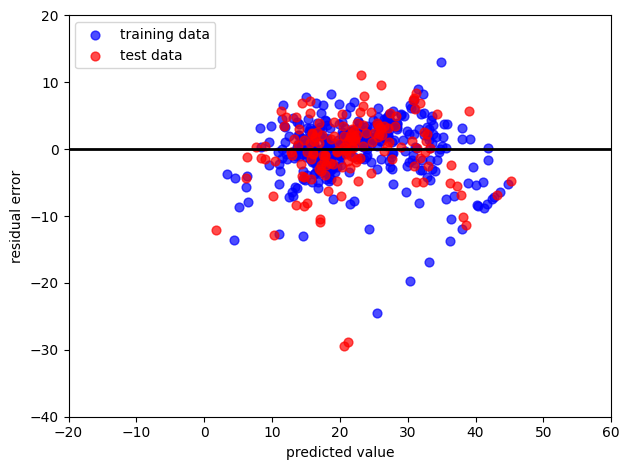

In [ ]:
# 予測値と残差をプロット/plot predictions and residuals
plt.scatter(y_train_pred,             # グラフのx値(予測値)/x-value of graph (predicted value)
            y_train_pred - y_train,   # グラフのy値(予測値と学習値の差)/y-value of the graph (difference between predicted and training values)
            c='blue',                 # プロットの色/plot color
            marker='o',               # マーカーの種類/marker type
            s=40,                     # マーカーサイズ/marker size
            alpha=0.7,                # 透明度/transparency
            label='training data')         # ラベルの文字/label text


# 予測値と残差をプロット（テストデータ）/plot predictions vs. residuals (test data)
plt.scatter(y_test_pred,
            y_test_pred - y_test,
            c='red',
            marker='o',
            s=40,
            alpha=0.7,
            label='test data')

# グラフ書式設定/graph formatting
plt.xlabel('predicted value')
plt.ylabel('residual error')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-20, xmax=60, lw=2, color='black')
plt.xlim([-20, 60])
plt.ylim([-40, 20])
plt.tight_layout()
plt.show()